- The outputs from the pest analysis is analyzed here. The following notebook provides a template for future notebooks.

File name - Case1_B_glm_rw_restart2.demo {Simulation is carried out with 20 parameters (10 for each material) }

1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU) - - Check from Pg. 100 - pestpp.5.0.8_manual.pdf
    - Input data
    - Sensitivity
    - Objective function
    - Residuals
    - Relative contribution of temperature and moisture on the objective function
    - Identifibility tool (TODO)
    - Covariance matrix (TODO)

In [121]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/pestpp/pestpp/rk_model_final_4yrs


In [122]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

In [124]:
import warnings
warnings.filterwarnings('ignore')

### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [125]:
directory_name = 'Case1_B_cv_rw.demo'
cf_name = 'Case1_B_cv_cf_v1_rw' # Control file name

In [126]:
directory_name

'Case1_B_cv_rw.demo'

#### b. Parameter Sensitivity 

In [134]:
sen_iteration = pd.read_csv(f'{directory_name}/{cf_name}.isen')
sen_iteration.index = sen_iteration['iteration']
sen_iteration.drop(axis=1, columns=['iteration'], inplace=True)
sen_iteration.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
3,1.654830e-17,9.067990e-17,7.112790e-20,7.112790e-20,7.376960e-19,1.037590e-18,3.764600e-19,1.829550e-19,1.638070e-18,1.769520e-19,1.337470e-19,9.480800e-20,3.398460e-19,2.492440e-19,2.732880e-19,3.440180e-19,3.095100e-09,0.000002,1.418250e-08,6.718030e-09


#### Why is it in the first two iterations, there is no sensitivity that is observed?

In [135]:
len(sen_iteration.columns.values)

20

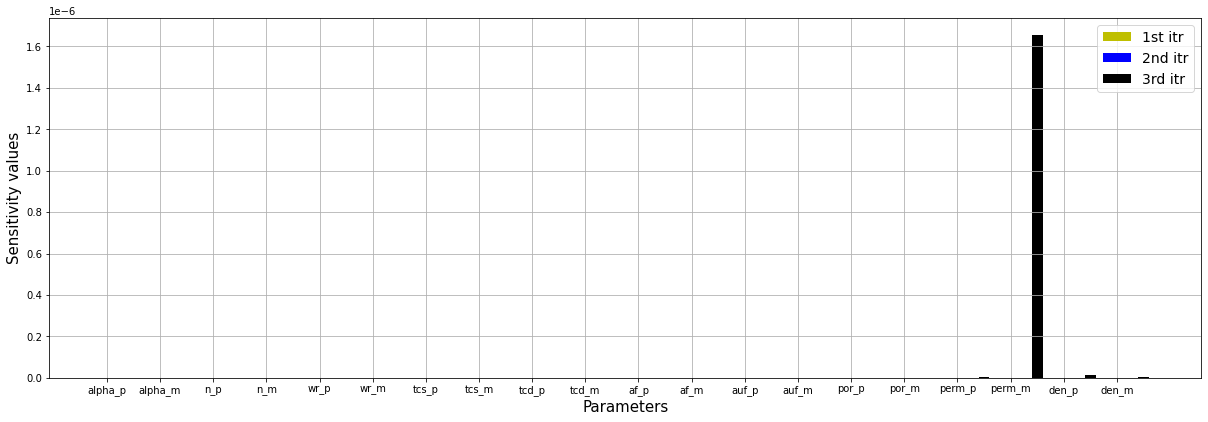

In [136]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(20) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, sen_iteration.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, sen_iteration.iloc[1,:], color='b', label='2nd itr', width=0.2)
ax.bar(X + 0.5, sen_iteration.iloc[2,:], color='k', label='3rd itr', width=0.2)
#ax.bar(X + 0.75, sen_iteration.iloc[9,:], color='g', label='9th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

##### Relative sensitivity values of all parameters

In [137]:
relative_set_itr = sen_iteration.copy()
for i, value in enumerate(sen_iteration.index):
    relative_set_itr.iloc[i,:] = sen_iteration.iloc[i,:]/relative_set_itr.iloc[i,:].max()

relative_set_itr.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e-11,5.479711e-11,4.298200e-14,4.298200e-14,4.457836e-13,6.270070e-13,2.274916e-13,1.105582e-13,9.898721e-13,1.069306e-13,8.082220e-14,5.729169e-14,2.053661e-13,1.506161e-13,1.651457e-13,2.078872e-13,0.00187,1.0,0.00857,0.00406


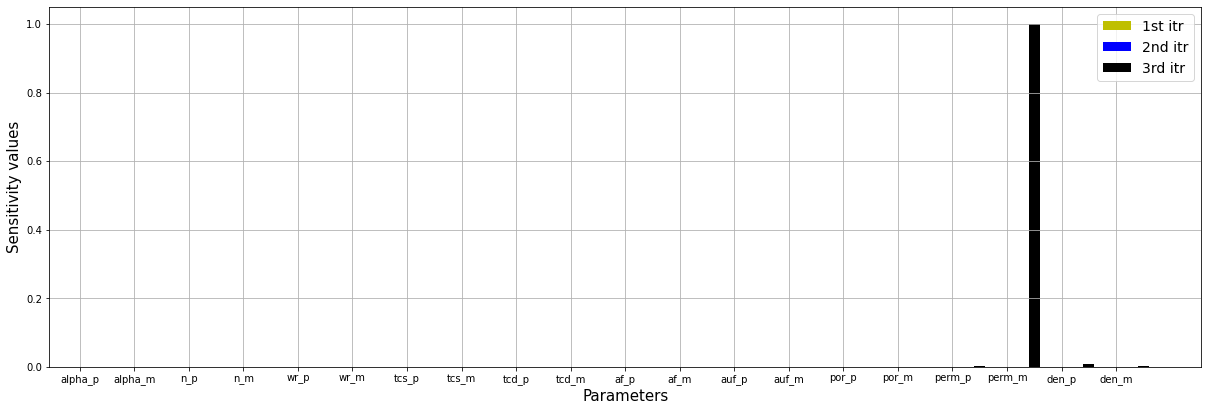

In [138]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(20) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, relative_set_itr.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, relative_set_itr.iloc[1,:], color='b', label='2nd itr', width=0.2)
ax.bar(X + 0.5, relative_set_itr.iloc[2,:], color='k', label='3rd itr', width=0.2)
#ax.bar(X + 0.75, relative_set_itr.iloc[9,:], color='g', label='9th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

### Plotting the change in parameters:


In [139]:
par_iteration = pd.read_csv(f'{directory_name}/{cf_name}.ipar')
par_iteration.index = par_iteration['iteration']
par_iteration.drop(axis=1, columns=['iteration'], inplace=True)
par_iteration

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
0,0.01,0.001825,2.05,2.05,0.224324,0.159488,0.439577,0.952105,0.101023,0.984405,1.50511,1.49939,0.486935,0.698884,0.637395,0.481031,5.346620e-11,1.000000e-13,900,1900
1,0.01,0.001825,2.05,2.05,0.224324,0.159488,0.439577,0.952105,0.101023,0.984405,1.50511,1.49939,0.486935,0.698884,0.637395,0.481031,5.346620e-11,1.000000e-13,900,1900
2,0.01,0.001825,2.05,2.05,0.224324,0.159488,0.439577,0.952105,0.101023,0.984405,1.50511,1.49939,0.486935,0.698884,0.637395,0.481031,5.346620e-11,1.000000e-13,900,1900
3,0.01,0.001825,2.05,2.05,0.224324,0.159488,0.439577,0.952105,0.101023,0.984405,1.50511,1.49939,0.486935,0.698884,0.637395,0.481031,5.346620e-11,1.000000e-13,900,1900


##### Changing the parameters relative to the initial value
- To ensure that we can plot the changes with respect to the parameters, we subtract the parameter values w.r.t the initial values and then multiply by 100.
\begin{equation}
    par_{change} = \frac{(par_{final} - par_{initial})}{par_{initial}} * 100
\end{equation}

In [140]:
par_change = par_iteration.copy()
#pargp_initial = par_change.iloc[0,:]
for i, index_value in enumerate(par_change.index):
    for j, col_value in enumerate(par_change.columns):
        #print(i, j)
        #print(par_change.iloc[i,j])
        par_change.iloc[i,j] = (par_iteration.iloc[i,j] - par_iteration.iloc[0,j])/par_iteration.iloc[0,j]*100
#np.abs(par_change)
par_change

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


#### Line plot of all parameter values


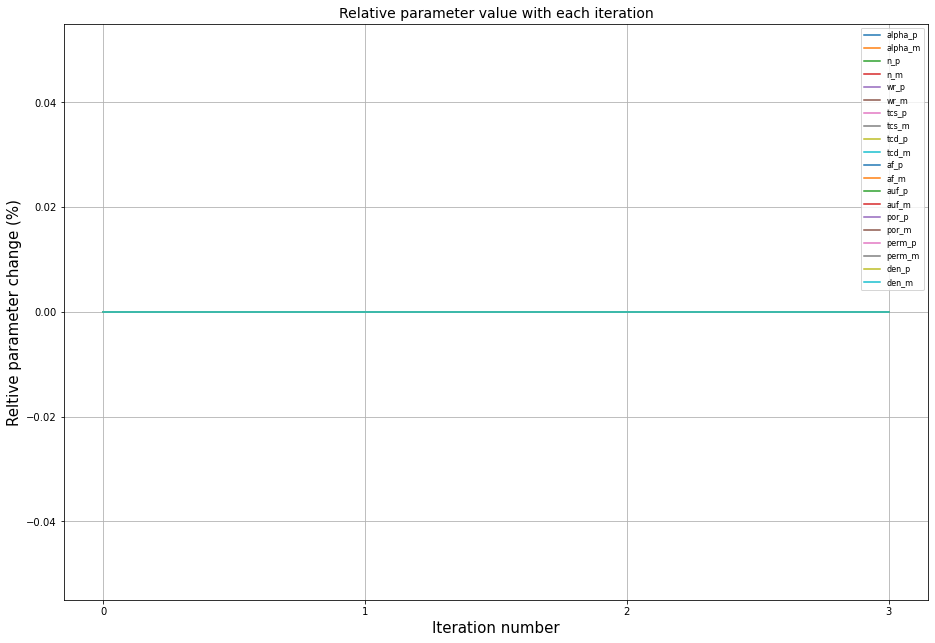

In [141]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_axes([0,0,1,1])

for i, value in enumerate(par_change.columns):
    ax.plot(par_change.iloc[:,i], label=f'{value}')
    

#ax.set_title(f'Relative parameter value with each iteration: Initial values - n_m = {np.round(par_iteration.iloc[0,0],5)}, tcs_m = {np.round(par_iteration.iloc[0,1],5)}, af_m = {np.round(par_iteration.iloc[0,2],5)}, af_p = {np.round(par_iteration.iloc[0,3],5)}', fontsize=14)
ax.set_title(f'Relative parameter value with each iteration',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Iteration number', fontsize=15)
ax.set_ylabel('Reltive parameter change (%)', fontsize=15)
ax.legend(fontsize=8)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

**Comments: The parameters that we have initially chosen was fairly accurate! - Most of the parameters have the same value** 

### c. Objective function

In [142]:
no_iteration = np.arange(1,len(par_change.index),1)
no_iteration

array([1, 2, 3])

In [143]:
# Residual files - importing the values from the file
# Residual files after each iteration
no_iteration = np.arange(1,len(par_change.index),1)
for i, value in enumerate(no_iteration):
    locals()[f'res_{value}'] = pd.read_csv(f'{directory_name}/{cf_name}.rei{value}', skiprows=2,delim_whitespace=True)

#res_best = pd.read_csv(f'{directory_name}/rk_model_glm_cf.res', skiprows=2,delim_whitespace=True)
#res_best
res_1.head()

,Name,Group,Measured,Modelled,Residual,Weight
0,stemp_0.04_0,temp,260.6422,270.150000,-9.507800,0.000076
1,stemp_0.04_1,temp,261.2884,259.136901,2.151499,0.000076
2,stemp_0.04_2,temp,261.3255,258.197106,3.128394,0.000076
3,stemp_0.04_3,temp,261.1522,257.479951,3.672249,0.000076
4,stemp_0.04_4,temp,260.7784,256.943673,3.834727,0.000076


#### Analyzing the residual weights:


In [144]:
res_1['Weight'].describe()

count    15344.000000
mean         0.000067
std          0.000009
min          0.000058
25%          0.000058
50%          0.000067
75%          0.000076
max          0.000076
Name: Weight, dtype: float64

In [145]:
res_1['Weight'].unique()

array([7.573979e-05, 5.806942e-05])

In [146]:
# Following the code from line 94 - file : res.py
def obj_fun(rei_df):
    """
    Function defined to calculate the objective function along with the residual values
    
    Input: rei_df - Residual dataframe
    
    
    """
    
    # Apply weighted residual and calculate phi contributions
    rei_df['Weighted_Residual'] = rei_df['Residual'] * rei_df['Weight']
    rei_df['Absolute_Residual'] = abs(rei_df['Residual'])
    rei_df['Weighted_Absolute_Residual'] = rei_df['Absolute_Residual'] * rei_df['Weight']
    
    # Calculate phi
    rei_df['Weighted_Sq_Residual'] = rei_df['Weighted_Residual']**2
    
    # Percentage contribution by each observation
    rei_df['Phi_Percent'] = rei_df['Weighted_Sq_Residual']/(rei_df['Weighted_Sq_Residual'].sum())*100
    
    return rei_df

In [147]:
# Finding the variation of residuals
for i, value in enumerate(no_iteration):
    locals()[f'res_phi_{value}'] = obj_fun(locals()[f'res_{value}'])
    
#res_phi_1 = obj_fun(res_1)
res_phi_1.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,260.6422,270.150000,-9.507800,0.000076,-0.000720,9.507800,0.000720,5.185711e-07,0.009515
1,stemp_0.04_1,temp,261.2884,259.136901,2.151499,0.000076,0.000163,2.151499,0.000163,2.655403e-08,0.000487
2,stemp_0.04_2,temp,261.3255,258.197106,3.128394,0.000076,0.000237,3.128394,0.000237,5.614242e-08,0.001030
3,stemp_0.04_3,temp,261.1522,257.479951,3.672249,0.000076,0.000278,3.672249,0.000278,7.735928e-08,0.001419
4,stemp_0.04_4,temp,260.7784,256.943673,3.834727,0.000076,0.000290,3.834727,0.000290,8.435620e-08,0.001548


In [148]:
res_phi_1['Weighted_Sq_Residual'].mean()

3.5519654925654604e-07

In [149]:
# Defining a dataframe with a objective function
# Changing the units by multiplying by 1e6

objfn_phi = pd.DataFrame(index=no_iteration,columns=['obj_func'])

for i, value in enumerate(no_iteration):
    objfn_phi.iloc[i,0] = locals()[f'res_phi_{i+1}']['Weighted_Sq_Residual'].mean()*1e7

objfn_phi.head()

,obj_func
1,3.551965
2,3.551965
3,3.551965


In [150]:
#fig, ax = plt.subplots(figsize=(14, 6))

#plt.figure(figsize=(10, 6))
#ax.plot(objfn_phi['obj_func'])
#ax.set_title('Plotting objective function with each iteration ', fontsize=15)
#ax.set_ylabel('Objective function (*1e7)', fontsize=12)
#ax.set_xlabel('Iteration number', fontsize=12)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.grid()

The values were calculated using a formula. It not the same as the objective function calculated by the PEST program!

Comments:
    
* It shows here that the second iteration has the least objective function value

How to determine the parameter dataset and residual values with the best dataset?

#### Accessing the objective function with every iteration 

In [151]:
obj_iteration = pd.read_csv(f'{directory_name}/{cf_name}.iobj')
#obj_iteration.index = par_iteration['iteration']
obj_iteration.drop(axis=1, columns=['iteration'], inplace=True)
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.00545,0.00545,0,0.002725,0.002725
1,31,0.00545,0.00545,0,0.002725,0.002725
2,61,0.00545,0.00545,0,0.002725,0.002725
3,111,0.00545,0.00545,0,0.002725,0.002725


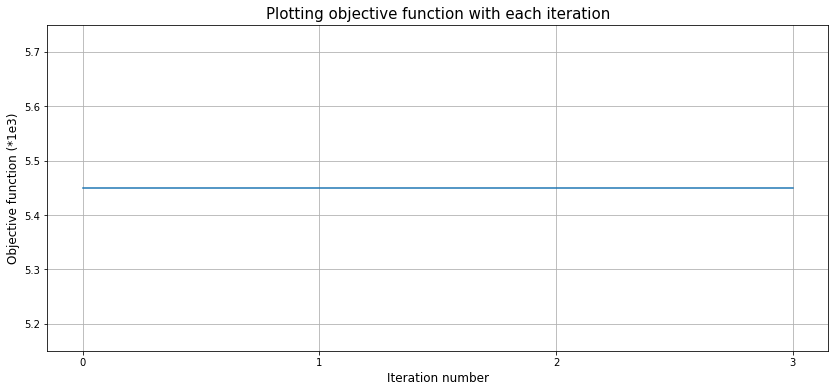

<Figure size 720x432 with 0 Axes>

In [152]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.figure(figsize=(10, 6))
ax.plot(obj_iteration['total_phi']*1e3)
ax.set_title('Plotting objective function with each iteration', fontsize=15)
ax.set_ylabel('Objective function (*1e3)', fontsize=12)
ax.set_xlabel('Iteration number', fontsize=12)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

**Comments:**
- Objective function remains constant and is probably due to the initial chosen values!
- Do we really need to really calibrate for 3 years? 

### d. Residuals
1. First choose the iteration with the minimum objective function value.
2. Then plot the residual based on this iteration

In [153]:
obj_iteration['total_phi'].idxmin()
# The iteration with the minimum objective function

0

In [154]:
# Finding the index where we will be encountering the minimum objective function
itrno_best = obj_iteration['total_phi'].idxmin()

# Finding the corresponding residuals
res_best = locals()[f'res_{itrno_best+1}'].copy()

res_best.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,260.6422,270.150000,-9.507800,0.000076,-0.000720,9.507800,0.000720,5.185711e-07,0.009515
1,stemp_0.04_1,temp,261.2884,259.136901,2.151499,0.000076,0.000163,2.151499,0.000163,2.655403e-08,0.000487
2,stemp_0.04_2,temp,261.3255,258.197106,3.128394,0.000076,0.000237,3.128394,0.000237,5.614242e-08,0.001030
3,stemp_0.04_3,temp,261.1522,257.479951,3.672249,0.000076,0.000278,3.672249,0.000278,7.735928e-08,0.001419
4,stemp_0.04_4,temp,260.7784,256.943673,3.834727,0.000076,0.000290,3.834727,0.000290,8.435620e-08,0.001548


In [155]:
res_best.iloc[:np.int(len(res_best)/2),:].tail()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
7667,stemp_1.6_1091,temp,268.7285,263.493899,5.234601,0.000076,0.000396,5.234601,0.000396,1.571865e-07,0.002884
7668,stemp_1.6_1092,temp,268.5410,263.492975,5.048025,0.000076,0.000382,5.048025,0.000382,1.461811e-07,0.002682
7669,stemp_1.6_1093,temp,268.3468,263.492050,4.854750,0.000076,0.000368,4.854750,0.000368,1.352017e-07,0.002481
7670,stemp_1.6_1094,temp,268.1482,263.491129,4.657071,0.000076,0.000353,4.657071,0.000353,1.244153e-07,0.002283
7671,stemp_1.6_1095,temp,267.9456,263.490208,4.455392,0.000076,0.000337,4.455392,0.000337,1.138728e-07,0.002089


In [96]:
res_best.iloc[np.int(len(res_best)/2):,:].head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
7672,smois_0.04_0,mois,7.897694,13.196482,-5.298788,0.000058,-0.000308,5.298788,0.000308,9.467776e-08,0.001737
7673,smois_0.04_1,mois,7.991826,13.171202,-5.179376,0.000058,-0.000301,5.179376,0.000301,9.045861e-08,0.001660
7674,smois_0.04_2,mois,7.992500,13.170656,-5.178156,0.000058,-0.000301,5.178156,0.000301,9.041600e-08,0.001659
7675,smois_0.04_3,mois,7.960069,13.170279,-5.210210,0.000058,-0.000303,5.210210,0.000303,9.153884e-08,0.001680
7676,smois_0.04_4,mois,7.913792,13.170016,-5.256224,0.000058,-0.000305,5.256224,0.000305,9.316284e-08,0.001709


In [97]:
temp_measured = res_best.iloc[:np.int(len(res_best)/2),2] # The 2nd column contains the measured values and we have only temperature values from the first half of the values
mois_measured = res_best.iloc[np.int(len(res_best)/2):,2]

temp_sim = res_best.iloc[:np.int(len(res_best)/2),3] # The 3rd column contains the simulated values 
mois_sim = res_best.iloc[np.int(len(res_best)/2):,3]

temp_res = res_best.iloc[:np.int(len(res_best)/2),4] # The 4th column contains the residual values 
mois_res = res_best.iloc[np.int(len(res_best)/2):,4]

In [115]:
res_best.iloc[:np.int(len(res_best)/(2*7)),:].tail()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
1091,stemp_0.04_1091,temp,257.3359,262.210150,-4.874250,0.000076,-0.000369,4.874250,0.000369,1.362899e-07,0.002501
1092,stemp_0.04_1092,temp,257.1298,262.210109,-5.080309,0.000076,-0.000385,5.080309,0.000385,1.480568e-07,0.002717
1093,stemp_0.04_1093,temp,256.7739,262.210068,-5.436168,0.000076,-0.000412,5.436168,0.000412,1.695251e-07,0.003110
1094,stemp_0.04_1094,temp,256.4260,262.210027,-5.784027,0.000076,-0.000438,5.784027,0.000438,1.919150e-07,0.003521
1095,stemp_0.04_1095,temp,256.6415,262.209987,-5.568487,0.000076,-0.000422,5.568487,0.000422,1.778781e-07,0.003264


In [158]:
res_best.iloc[:np.int(len(res_best)/(2*7)),3]

0       270.150000
1       259.136901
2       258.197106
3       257.479951
4       256.943673
           ...    
1091    262.210150
1092    262.210109
1093    262.210068
1094    262.210027
1095    262.209987
Name: Modelled, Length: 1096, dtype: float64

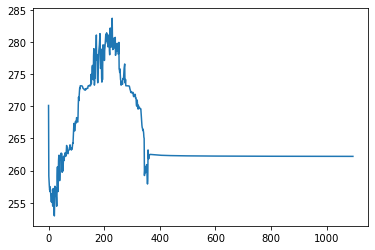

In [159]:
plt.plot(res_best.iloc[:np.int(len(res_best)/(2*7)),3])

Text(0.5, 0, 'Days')

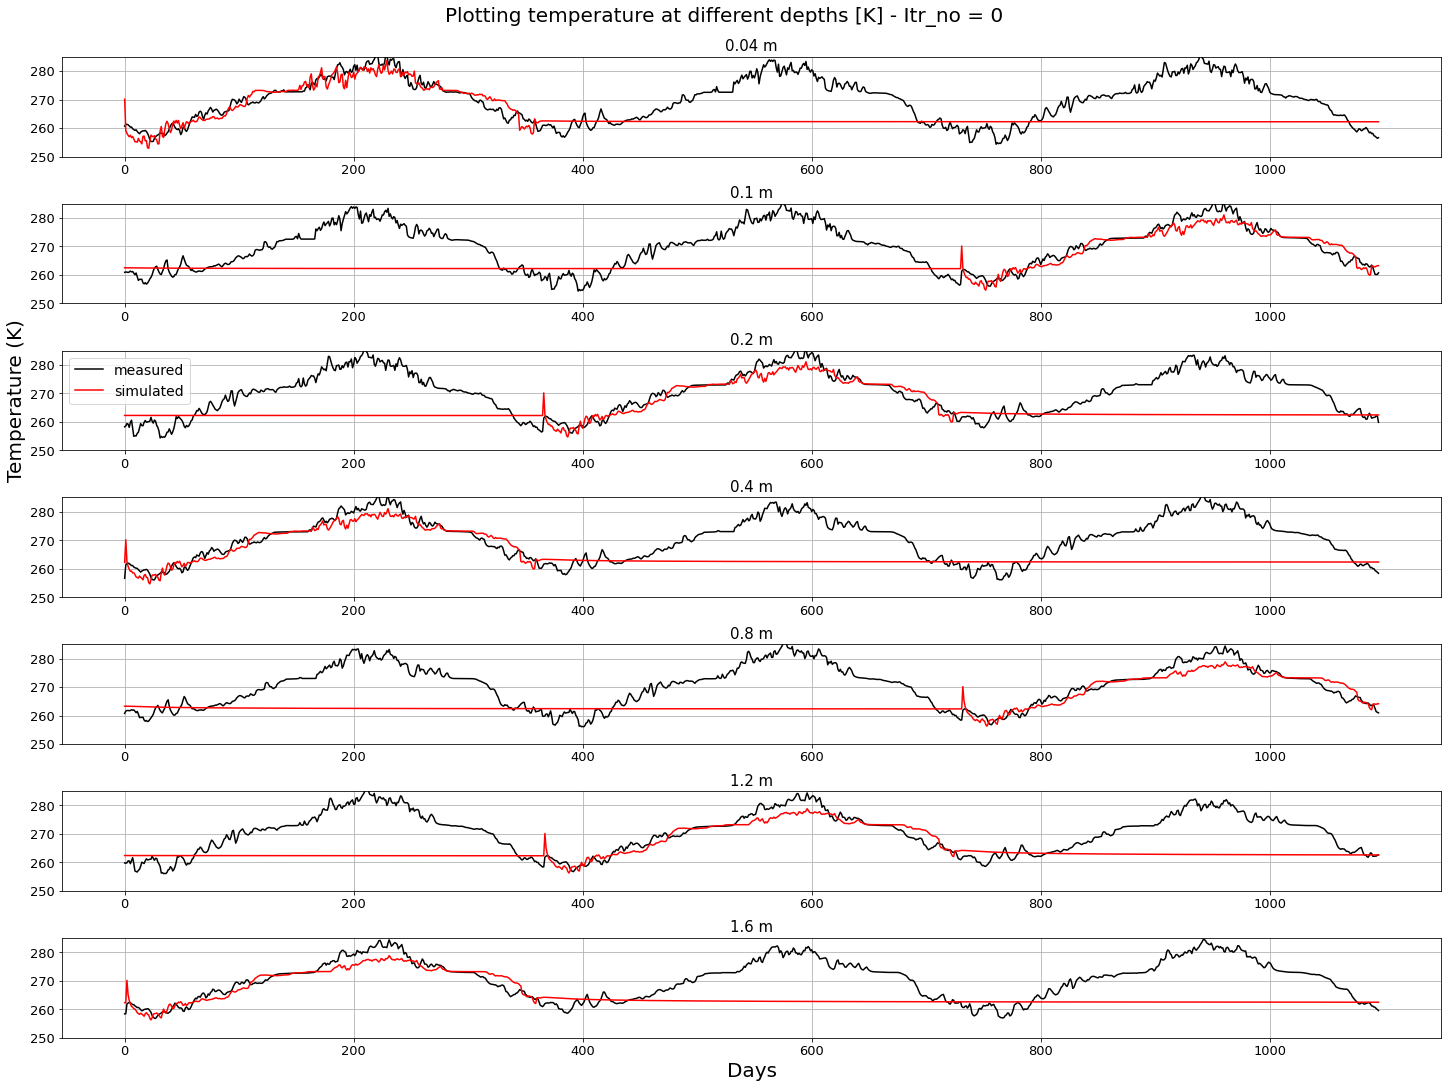

In [118]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])
f2_ax7 = fig2.add_subplot(spec2[6, 0])

fig2.suptitle(f'Plotting temperature at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+1096].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim[x:x+1096].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax7.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

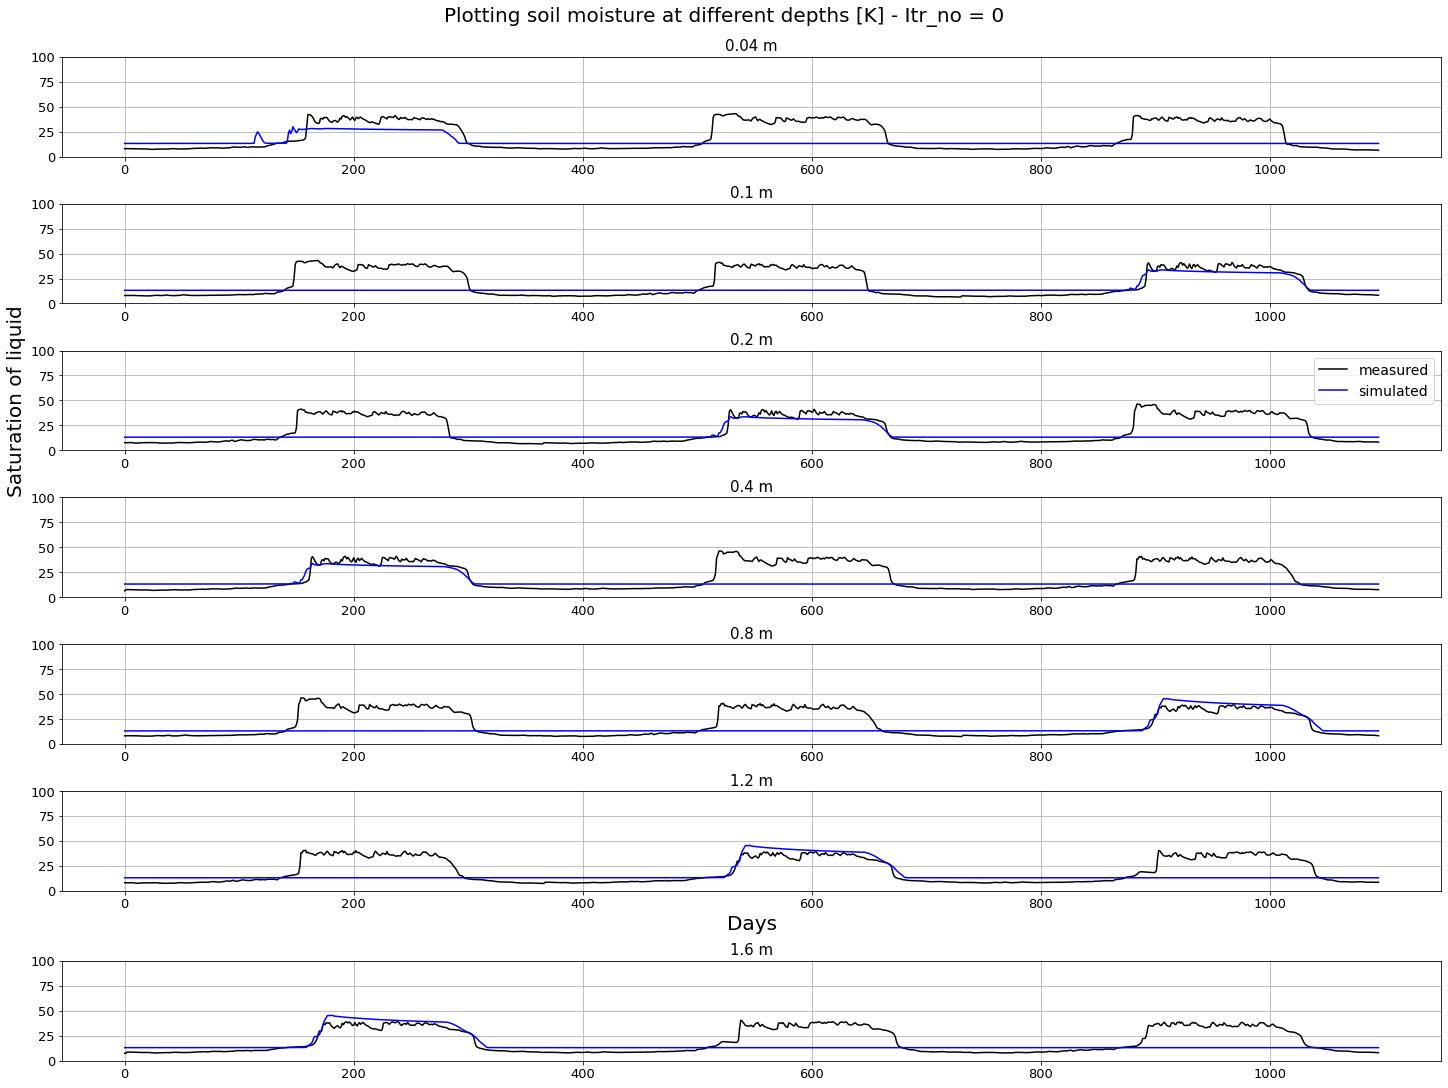

In [120]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])
f2_ax7 = fig2.add_subplot(spec2[6, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+1096].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim[x:x+1096].values, 'b', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
1. The moisture estimates have remained more or less the same.! - The model process needs to be defined more accurately, change of parameters, addition of parameters, ..
2. 

In [34]:
mois_measured[4519]

37.60354

<Figure size 720x432 with 0 Axes>

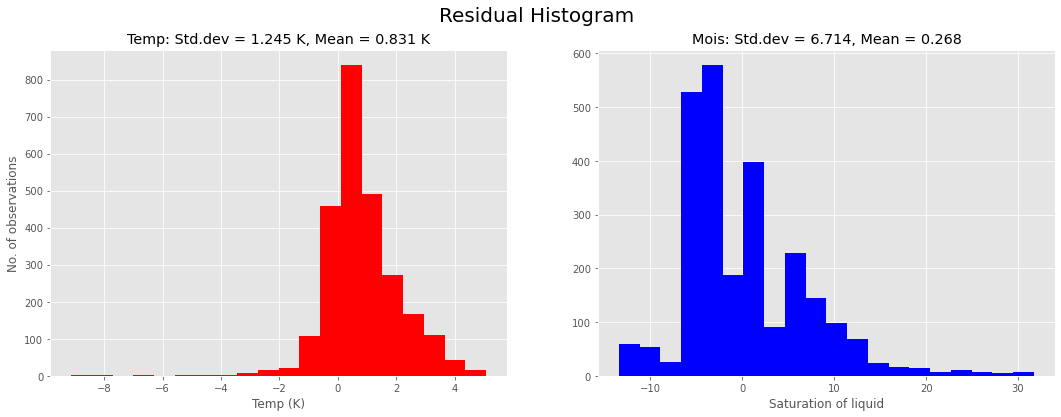

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [36]:
temp_res.describe()

count    2555.000000
mean        0.830761
std         1.244975
min        -9.126700
25%         0.111020
50%         0.640862
75%         1.455707
max         5.067082
Name: Residual, dtype: float64

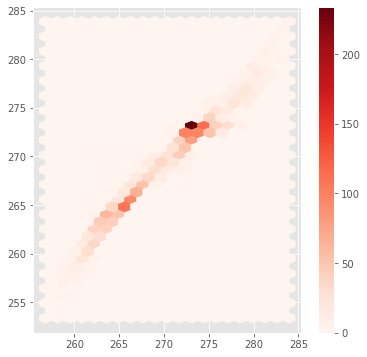

In [37]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

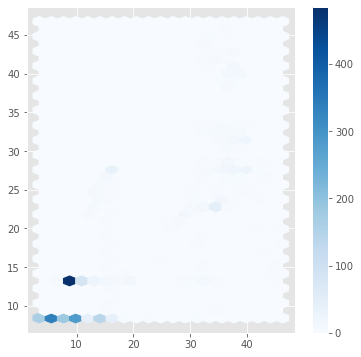

In [38]:
plt.figure(figsize=(6, 6))
plt.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

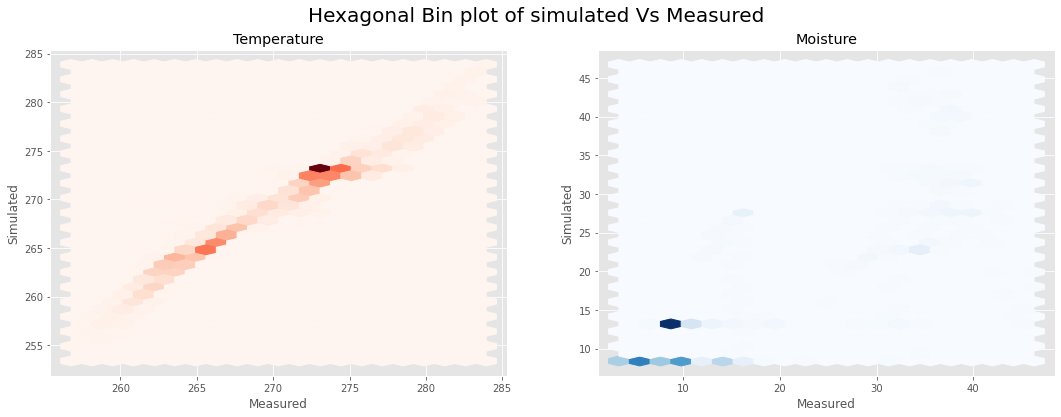

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)

#### f. Relative contribution of temperature and moisture on the objective function

In [40]:
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.010773,0.010773,0,0.005386,0.005386
1,31,0.010676,0.010676,0,0.005357,0.005319
2,61,0.010320,0.010320,0,0.005258,0.005063
3,111,0.010293,0.010293,0,0.005224,0.005069
4,161,0.008927,0.008927,0,0.004902,0.004025
5,211,0.008050,0.008050,0,0.004248,0.003801
6,261,0.007671,0.007671,0,0.003909,0.003762
7,311,0.007351,0.007351,0,0.003718,0.003633
8,361,0.007082,0.007082,0,0.003662,0.003419
9,411,0.006972,0.006972,0,0.003639,0.003333


In [41]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

np.array(obj_itr_best[['temp','mois']])*1e6

array([3397.12, 2281.39])

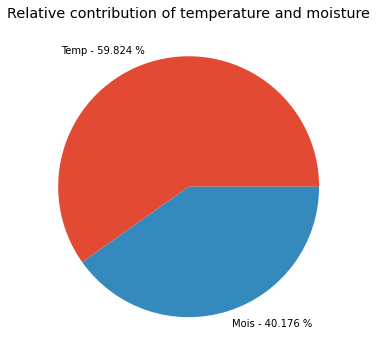

In [42]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

con_variables = np.array(obj_itr_best[['temp','mois']])/obj_itr_best['measurement_phi']*100

### To find the percentage contribution, we need subtract it with total_phi and multiply 

plt.figure(figsize=(6,6))
plt.title('Relative contribution of temperature and moisture')
mylabels=[f'Temp - {np.round(con_variables[0],3)} %',f'Mois - {np.round(con_variables[1],3)} %']
plt.pie(con_variables,labels=mylabels)
#plt.legend()
plt.show()
#plt.legend()

### How does the best parameters look like? Are they plausible? How do they compare with the other cases? Do we go for the case with optimal value or a case that shows more physical possibility?

In [43]:
itrno_best

22

In [44]:
par_iteration.loc[22,:]

alpha_p    2.500000e-03
alpha_m    3.193600e-03
n_p        1.756140e+00
n_m        2.029510e+00
wr_p       1.646830e-01
wr_m       1.660710e-01
tcs_p      6.716150e-01
tcs_m      9.117690e-01
tcd_p      1.767910e-01
tcd_m      9.485100e-01
af_p       1.500540e+00
af_m       1.499290e+00
auf_p      3.898450e-01
auf_m      6.997300e-01
por_p      8.006830e-01
por_m      5.066460e-01
perm_p     1.336660e-11
perm_m     6.439670e-14
den_p      9.000000e+02
den_m      1.900000e+03
Name: 22, dtype: float64

### Exporting the values:

The values are mainly exported for the best iteration i.e. with the least objective function.

#### 1. Parameters:

In [52]:
### Best parameters:
best_params = par_iteration.loc[itrno_best,:]
### Saving it as a csv file
best_params.to_csv('Final_comp_cases_data/best_params_Case1_B_glm_rw_restart2.csv',sep=',')

#### 2. Residuals - Temperature and moisture

In [53]:
res_best.to_csv('Final_comp_cases_data/best_res_Case1_B_glm_rw_restart2.csv',sep=',')

#### 3. Objective function

In [54]:
obj_iteration.to_csv('Final_comp_cases_data/obj_fn_Case1_B_glm_rw_restart2.csv',sep=',')

In [55]:
#### 4. Parameter sensitivity - best
sen_best = sen_iteration.loc[itrno_best,:]
sen_best.to_csv('Final_comp_cases_data/best_sen_Case1_B_glm_rw_restart2.csv',sep=',')

#### f. Identifibility tool - Identifiability is defined here as the capability of model calibration to constrain parameters used by a model.
- Go through the article and extract results later!

#### g. Plotting the covariance matrix for the variables